## Prevenção do suicídio usando causalidade em aprendizado de máquina
O aumento alarmante do numero de pessoas afetadas por doenças mentais tornou-se um dos principais problemas de saúde pública enfrentado pelos governos em todo o mundo.
O suicídio esta entre as 20 causas de morte mais comuns segundo avaliação da Organização Mundial da Saúde (Organization et al., 2019), superando malaria, câncer de mama
ou homicídio e nos últimos 20 anos, houve um aumento de 24% dos casos.
Utilizamos dados de classificação clínica e identificamos os possíveis fatores causais que possam estabelecer relações com a ideação suicida.
Para tanto, utilizamos métodos de inferência causal e aprendizado de maquina.

Os fatores utilizados para inferência causal foram: Sexo, Estado Civil, Tipo de Residência, Alcoólatra, Droga, Suicídio na Família, Depressão na Família,
Alcoólatra Família, Droga na Família, Neuro, Psiquiátrica, Capaz de desfrutar das coisas, Impacto de sua Família e amigos, Capaz de tomar decisões importantes,
Estudante, Insônia, Ansiedade, Perda de insights, Apetite, Perda de Peso, Ansiedade somática, Hipocondriase, Sentimento de Culpa, Trabalho e interesses,
Energia, Lentidão pensamento e fala, Agitação, Libido, TOC e idade.

Após nossa pesquisa, os fatores que se apresentaram como possíveis causas que levam um indivíduo a ter ideação suicida foram: Suicídio na família, Drogas na família,
Capaz de tomar decisões importantes, Estudante, Hipocondriase, Sentimentos de culpa, Trabalho e interesses e Energia.

O objetivo desse projeto é fazer simulações contrafctuais para obter os possíveis fatores que influenciam determinado indivíduo a ter ideação suicida.
De posse dele, os profissionais da área de saúde que atendem pacientes com ideação suicida, poderão trabalhar com os mesmos de forma mais assertiva objetivando atenuar ou até eliminar
tal ideação.

Passos para execução:
                                                   
1) Preencha a planilha data_base.csv com os dados dos pacientes de acordo com os parâmetros:
   
	  > Suicídio na família: Entre com 1 para Sim e 0 para não.
	     
	  > Capaz de tomar decisões importantes: Entre com um número de 1 a 5, sendo: 1=Concordo totalmente; 2=Concordo; 3=Neutro; 4=Discordo;
		5=Discordo totalmente.
   
	  > Estudante: Entre com 1 para Sim e 0 para não.
   
	  > Hipocondriase: Entre com um número de 0 a 4, sendo: 0=Ausente; 1=Leve 2=Moderado; 3=Moderadamente grave;
		4=Grave.
   
	  > Sentimentos de culpa: Entre com um número de 0 a 4, sendo: 0=Ausente, 1=Duvidoso ou trivial: Autocensura, sente que decepcionou as
		pessoas	2=Leve: Idéias de culpa ou ruminação sobre erros passados ou atos pecaminosos; 3=Moderado: A doença atual é uma punição.
		Delírios de culpa	4=Grave: Ouve vozes acusatórias ou denunciatórias e/ou experimenta alucinações visuais ameaçadoras.
   
	  > Trabalho e interesses: Entre com um número de 0 a 4, sendo:0=Ausente: Sem dificuldade; 1=Duvidoso ou trivial: Pensamentos e
		sentimentos de incapacidade, cansaço ou fraqueza relacionados às atividades; trabalho ou hobbies; 2=Leve: Perda de interesse pela
		atividade; hobbies	ou trabalho – relatados diretamente pelo paciente, ou indiretos em apatia, indecisão e vacilação
		(sente que precisa se esforçar para
		trabalhar ou realizar atividades); 3=Moderado: Diminuição do tempo real gasto nas atividades ou diminuição da produtividade; 4=Grave:
		Deixou de trabalhar por doença atual.
   
	  > Depressão na familia:  Entre com 1 para Sim e 0 para não.
   
      > Histórico de uso de álcool na familia:  Entre com 1 para Sim e 0 para não.
   
      > Capaz de desfrutar das coisas: Entre com um número de 1 a 5, sendo: 1=Concordo totalmente; 2=Concordo; 3=Neutro; 4=Discordo;
		5=Discordo totalmente.

	  > Uso de drogas: Entre com um número de 0 a 2, sendo: 0=Nenhum verificado; 1=Abuso; 2=Dependente.
   
	  > Suicidio: Entre com um número de 0 a 4, sendo: : 0=Ausente; 1=Sente que a vida está vazia; 2=Desejos de morte;
		3=Pensamentos suicidas ativos; 4=Tentativa grave de suicídio.
   
	  > Ansiedade: Entre com um número de 0 a 4, sendo: 0=Ausente: Sem dificuldade 1=Duvidoso ou trivial:
		Tensão subjetiva e irritabilidade;
		2=Leve: Preocupação com assuntos menores; 3=Moderado: Atitude apreensiva aparente na face ou na fala;
		4=Grave: Medos expressos sem questionamento.

2) Faça o upload dos arquivos data.csv e data_base.csv acessando o ícone Arquivos no menu do canto esquerdo, navegando até a pasta que contenha os arquivos. Selecione ambos e clique em abrir ignorando o aviso.

3) Acesse o menu Ambiente de execução/Executar tudo

4) Após alguns minutos será gerado o arquivo data_final com o nível de ideação suicida predito e com os fatores que refletiram alterações no nível de ideação suicida após alguma mudança. Acesse o ícone Arquivos no menu do canto esquerdo, clique com o botão direito no arquivo data_final e selecione Fazer download. O arquivo será salvo na pasta download do seu computador.

Obs: A alteração do valor do nível de ideação suicida em alguma simulação, pode significar que o indíviduo é sensível ao fator da simulação em questão.
O valor da coluna ID da planilha data_final corresponde ao número da linha que determinado indíviduo está localizado no arquivo data_base.


In [1]:
#Importando bibliotecas
import torch
import pandas as pd
import numpy as np

from torch.utils.data import Dataset, DataLoader

import torch.nn as nn

import matplotlib.pyplot as plt

import importlib
if importlib.util.find_spec('ipywidgets') is not None:
    from tqdm.auto import tqdm
else:
    from tqdm import tqdm

from typing import Union
import time
from datetime import timedelta
from sklearn.model_selection import train_test_split

In [2]:
# Lendo dados

In [2]:
#Liste de features geradas no grafo causal
notears_selected = [
   "Suic_familia",
    "Capaz de tomar decisões importantes",
    "Estudante",
    "Hipocondriase",
    "Sentimentos_culpa",
    "Trabalho e interesses",
    'Dep_familia',
    'Alc_familia',
    'Capaz de desfrutar das coisas',
    'Droga',
    'Suicidio',
    'Ansiedade',
     ]

# Criando conjunto de dados causal

In [3]:
# Conjunto de dados de X
class CausalDataset(Dataset):
    def __init__(self, X, target:Union[list, int]):
        torch.manual_seed(3)
        self.X = torch.tensor(X, dtype=torch.double)
        self.target = target
        if isinstance(target, int):
            self.target = [target]

        # X é toda variável, exceto a lista de targets
        dims = list(range(self.X.shape[1]))
        self.x = self.X[:, [i for i in dims if i not in self.target]]
        self.y = self.X[:, self.target]

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx].double(), self.y[idx].double()

In [4]:
class MLP(torch.nn.Module):
    def __init__(self, dim_list:list, add_dropout:bool=False):
        super(MLP, self).__init__()
        torch.manual_seed(3)
        self.layers = torch.nn.ModuleList()
        for i in range(len(dim_list) - 2):
            self.layers.append(torch.nn.Linear(dim_list[i], dim_list[i+1]))
            self.layers.append(torch.nn.ReLU())
            if add_dropout:
                self.layers.append(torch.nn.Dropout(0.3))

        self.layers.append(torch.nn.Linear(dim_list[-2], dim_list[-1]))
        self.double()

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Pipeline de treino do modelo

In [5]:
def trainPipeline(dataset, model, batch_size=64, train_split=0.8, verbose=True, max_epochs=100, patience=10, lr=0.001, weight_decay=0.0, loss_fn=nn.MSELoss()):
    torch.manual_seed(3)
    train_size = int(train_split * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    criterion = loss_fn
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    patience = patience

    train_losses = []
    test_losses = []
    for epoch in tqdm(range(max_epochs)):
        train_loss = 0
        model.train()
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        test_loss = 0
        model.eval()
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                loss = criterion(output, target)
                test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        if verbose:
            print(f"Epoch {epoch} - Train loss: {train_loss} - Test loss: {test_loss}")

        if epoch > 10:
            all_patience = test_losses[-patience:]
            test_loss = test_losses[-1]
            if all([test_loss > x for x in all_patience]):
                print("Early stopping")
                break

    # teste do modelo no conjunto de teste e cálculo da precisão
    model.eval()
    with torch.no_grad():
        y_pred_test = []
        y_true_test = []
        y_pred_train = []
        y_true_train = []

        for data, target in train_loader:
            output = model(data)
            y_pred_train.append(output)
            y_true_train.append(target)
        for data, target in test_loader:
            output = model(data)
            y_pred_test.append(output)
            y_true_test.append(target)

        y_pred_test = torch.cat(y_pred_test, dim=0)
        y_true_test = torch.cat(y_true_test, dim=0)
        y_pred_train = torch.cat(y_pred_train, dim=0)
        y_true_train = torch.cat(y_true_train, dim=0)

        train_error = torch.abs(y_pred_train - y_true_train)
        test_error = torch.abs(y_pred_test - y_true_test)

        # calculando acurácia para cada tárget
        test_accuracy = []
        train_accuracy = []
        for i in range(len(y_true_test[0])):
            test_accuracy.append(torch.sum(test_error[:, i] < 0.5) / len(test_error))
            train_accuracy.append(torch.sum(train_error[:, i] < 0.5) / len(train_error))

        print(f"Final Train accuracy: {train_accuracy}")
        print(f"Final Test accuracy: {test_accuracy}")

    metrics = {
        "train_loss": train_losses,
        "test_loss": test_losses,
        "train_error": train_error,
        "test_error": test_error,
        "test_accuracy": test_accuracy
    }

    return model, metrics

## Agora adicionamos os erros ao conjunto de dados e treinamos o modelo contrafactual

In [6]:
# Criando o modelo counterfactual

class CounterfactualModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CounterfactualModel, self).__init__()
        self.individuality_model = MLP([input_size, hidden_size, hidden_size, hidden_size, 1], add_dropout=True)
        self.counterfactual_model = MLP([input_size+1, hidden_size, hidden_size, hidden_size, output_size], add_dropout=True)

    def individuality(self, x):
        return self.individuality_model(x)

    def counterfactual(self, x, i):
        x = torch.cat([x, i], dim=1)
        return self.counterfactual_model(x)

    def forward(self, x):
        i = self.individuality(x)
        y = self.counterfactual(x, i)
        return y

# Treino do modelo com features selecionadas na inferência causal

In [8]:
## Primeiro treinamos um modelo para cada target e obtemos o valor dos erros (individualidade)

In [73]:
# todo
# from typing import Union
dataframe = pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\final_novo.csv',
                        sep=';') 

dataframe = dataframe.drop(['Chave'], axis=1) 
dataframe = dataframe.fillna(-1)  #todo -1
dataframe['Anos educacao formal'] = dataframe['Anos educacao formal'].replace(-5, -1)
dataframe['sexo'].replace({'M': 0, 'F': 1}, inplace=True)
df_suic = dataframe.copy()
df_suic = df_suic.astype(float)
df_suic.shape


(3953, 68)

In [74]:
df_suic['Id'] = df_suic.index

In [28]:
# Dividindo em treino e teste (70% treino, 30% teste)
df_train, df_test = train_test_split(df_suic, test_size=0.3, random_state=42)

# Resetando índices (opcional)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

  0%|          | 0/300 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.3967)]
Final Test accuracy: [tensor(0.3610)]


  0%|          | 0/300 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.4871)]
Final Test accuracy: [tensor(0.4549)]


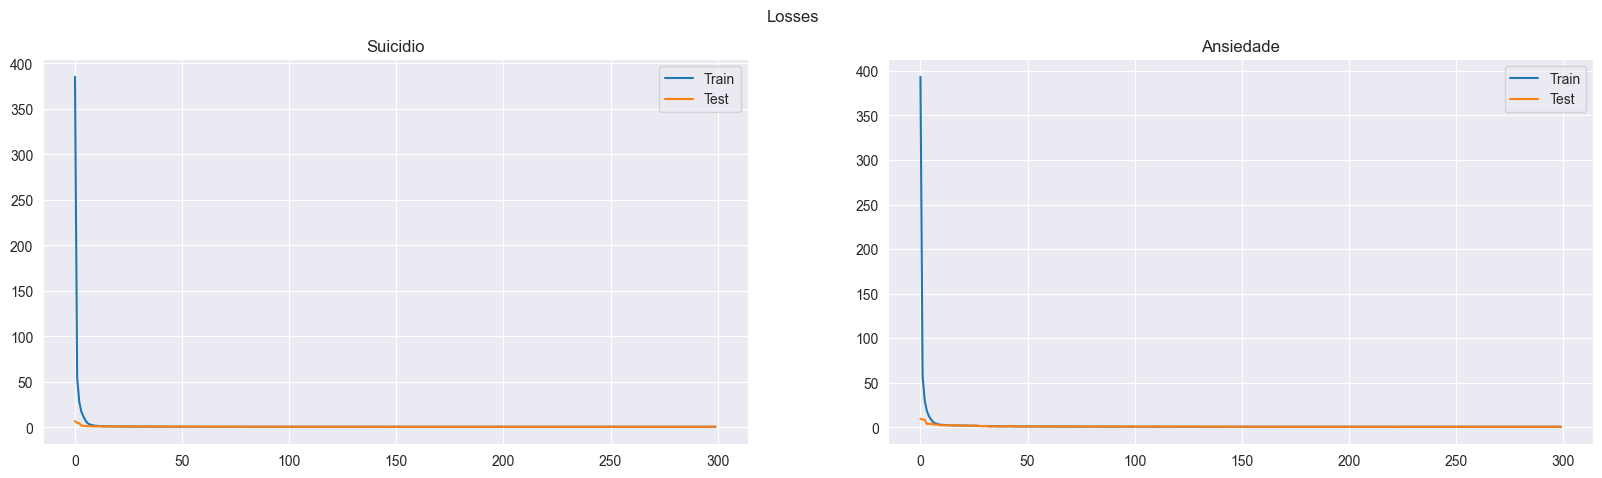

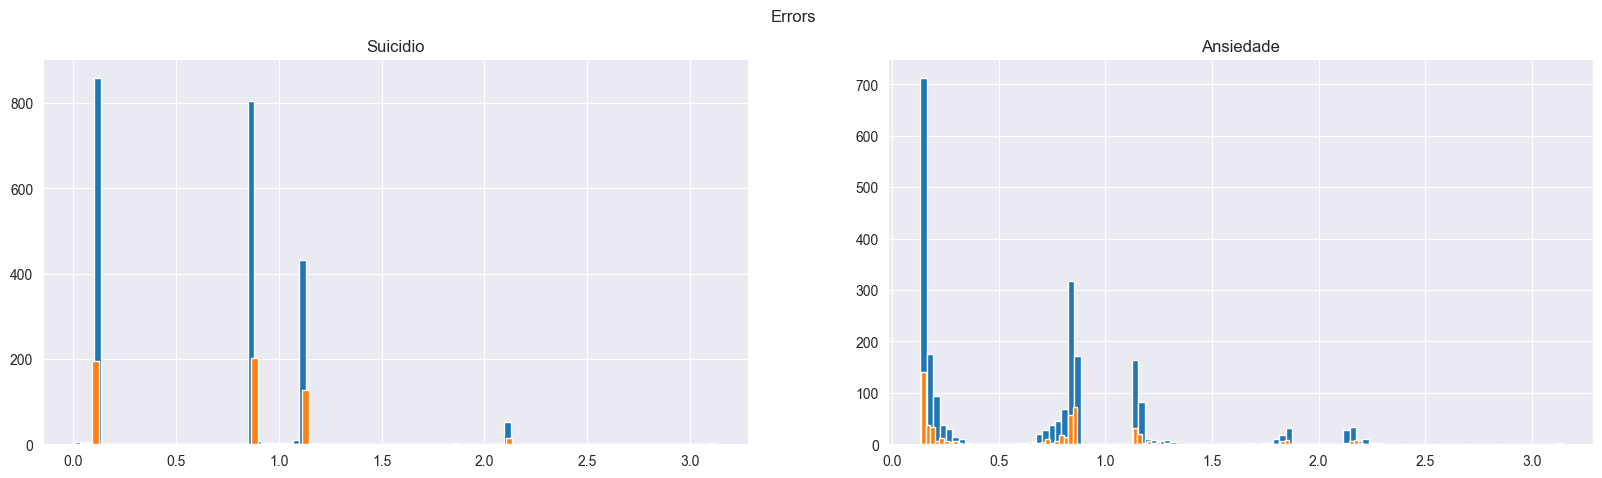

  0%|          | 0/300 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.3967), tensor(0.4871)]
Final Test accuracy: [tensor(0.3610), tensor(0.4549)]


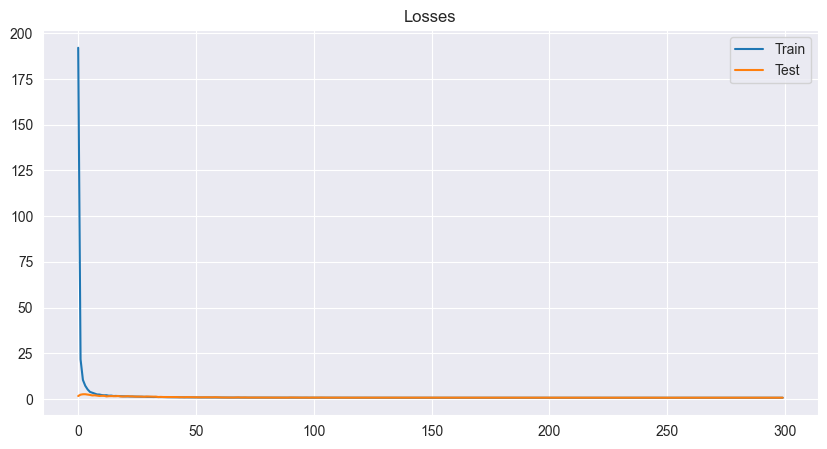

  0%|          | 0/1000 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.9616)]
Final Test accuracy: [tensor(0.9422)]


  0%|          | 0/1000 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.7994)]
Final Test accuracy: [tensor(0.7112)]


In [29]:
#df_suic['Suicidio']=np.where((df_suic['Suicidio'] >1),1,0) #todo
df_suic_notears = df_train.copy()
df_suic_notears = df_suic_notears[notears_selected]
# calculate errors
suic_erros = []
anx_erros = []
# get the target collumns indexes
targets = ["Suicidio", "Ansiedade"]
targets_idx = [df_train.columns.get_loc(c) for c in targets]

# Create the dataset
suic_dataset = CausalDataset(df_train.values, targets_idx[0])
anx_dataset = CausalDataset(df_train.values, targets_idx[1])
sample_x, sample_y = suic_dataset[0]

# Now we predict the first target with a MLP
suic_model = MLP([sample_x.shape[0], 64, 64, 64, 1], add_dropout=True)
anx_model = MLP([sample_x.shape[0], 64, 64, 64, 1], add_dropout=True)

suic_model, suic_metrics = trainPipeline(suic_dataset, suic_model, verbose=False, max_epochs=300, weight_decay=1e-5)
anx_model, anx_metrics = trainPipeline(anx_dataset, anx_model, verbose=False, max_epochs=300, weight_decay=1e-5)

# plot the losses with subplots todo
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle("Losses")
axs[0].plot(suic_metrics["train_loss"], label="Train")
axs[0].plot(suic_metrics["test_loss"], label="Test")
axs[0].set_title("Suicidio")
axs[0].legend()

axs[1].plot(anx_metrics["train_loss"], label="Train")
axs[1].plot(anx_metrics["test_loss"], label="Test")
axs[1].set_title("Ansiedade")
axs[1].legend()

plt.show()


#  plot errors hist with subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle("Errors")
axs[0].hist(suic_metrics["train_error"][:,0], label="Train", bins=100)
axs[0].hist(suic_metrics["test_error"][:,0], label="Test", bins=100)
axs[0].set_title("Suicidio")

axs[1].hist(anx_metrics["train_error"][:,0], label="Train", bins=100)
axs[1].hist(anx_metrics["test_error"][:,0], label="Test", bins=100)
axs[1].set_title("Ansiedade")

plt.show()
with torch.no_grad():
    for data, y_true in suic_dataset:
        y_pred = suic_model(data)
        error = torch.abs(y_pred - y_true).item()
        suic_erros.append(error)
    for data, y_true in anx_dataset:
        y_pred = anx_model(data)
        error = torch.abs(y_pred - y_true).item()
        anx_erros.append(error)

suic_erros = np.array(suic_erros)
anx_erros = np.array(anx_erros)

# add errors to the dataframe   
df_suic_with_errors = df_train.copy()
df_suic_with_errors["Suicidio_error"] = suic_erros
df_suic_with_errors["Ansiedade_error"] = anx_erros

# create the causal dataset with the errors
targets_idx = [df_suic_with_errors.columns.get_loc(c) for c in targets]
causal_dataset_error = CausalDataset(df_suic_with_errors.values, targets_idx)
sample_x, sample_y = causal_dataset_error[0]

# create the counterfactual model
cf_model = CounterfactualModel(sample_x.shape[0], 64, sample_y.shape[0])

# train the counterfactual model
cf_model, cf_metrics = trainPipeline(causal_dataset_error, cf_model, verbose=False, max_epochs=300, weight_decay=1e-5)

# plot the losses 
plt.figure(figsize=(10, 5))
plt.plot(cf_metrics["train_loss"], label="Train")
plt.plot(cf_metrics["test_loss"], label="Test")
plt.title("Losses")
plt.legend()
plt.show()
# Criando modelos para cada target
targets = ["Suicidio", "Ansiedade"]
targets_idx = [df_suic_notears.columns.get_loc(c) for c in targets]

# Criando base de dados
notears_suic_dataset = CausalDataset(df_suic_notears.values, targets_idx[0])
notears_anx_dataset = CausalDataset(df_suic_notears.values, targets_idx[1])
sample_x, sample_y = notears_suic_dataset[0]

# Agora prevemos os alvos com um MLP (Perceptron multicamadas)
suic_causal_model = MLP([sample_x.shape[0], 64, 64, 64, 1], add_dropout=True)
anx_causal_model = MLP([sample_x.shape[0], 64, 64, 64, 1], add_dropout=True)

suic_causal_model, suic_causal_metrics = trainPipeline(notears_suic_dataset, suic_causal_model, verbose=False, max_epochs=1000, weight_decay=1e-5)
anx_causal_model, anx_causal_metrics = trainPipeline(notears_anx_dataset, anx_causal_model, verbose=False, max_epochs=1000, weight_decay=1e-5)


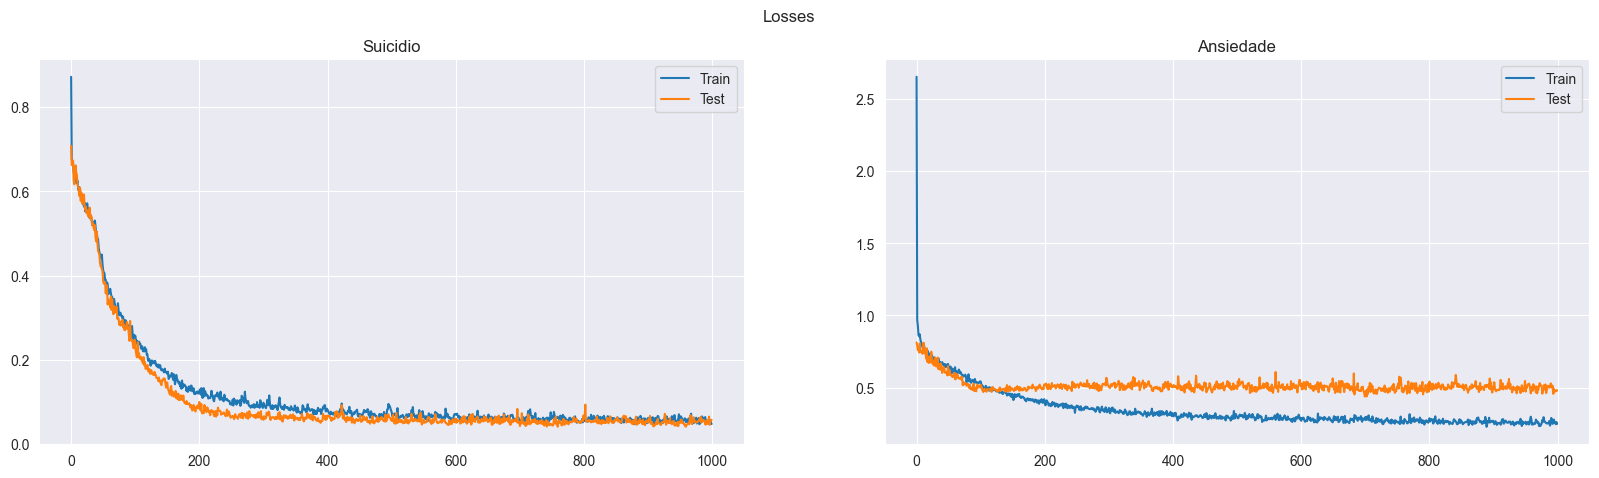

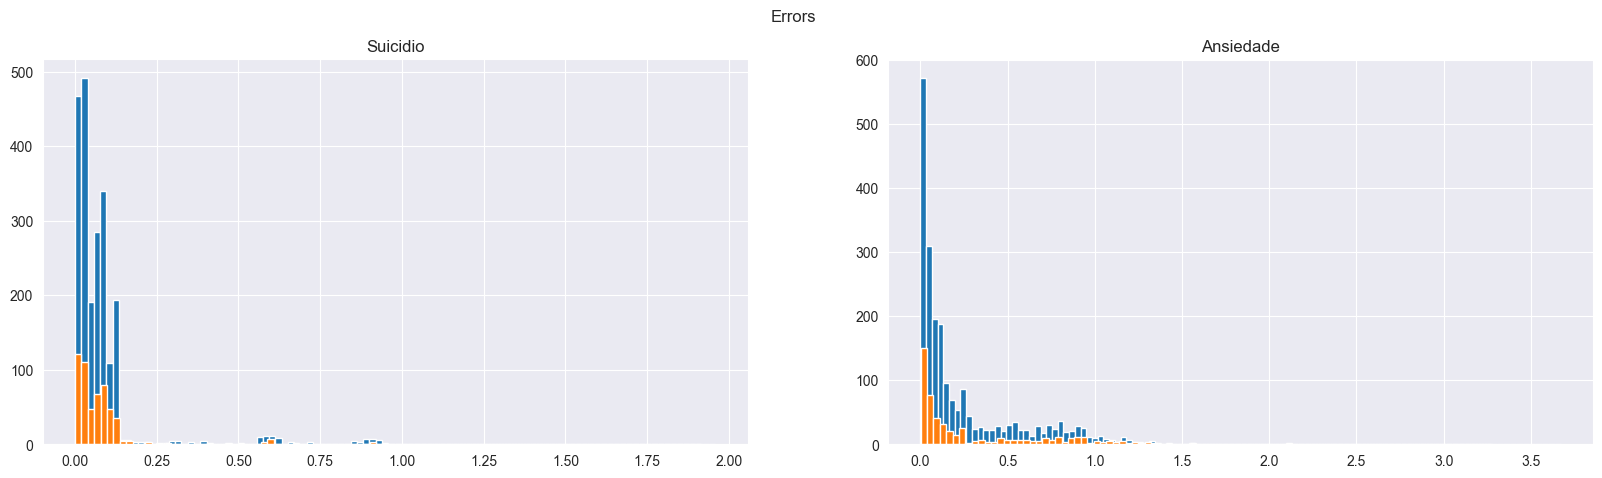

In [30]:
# plot the losses with subplots todo
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle("Losses")
axs[0].plot(suic_causal_metrics["train_loss"], label="Train")
axs[0].plot(suic_causal_metrics["test_loss"], label="Test")
axs[0].set_title("Suicidio")
axs[0].legend()

axs[1].plot(anx_causal_metrics["train_loss"], label="Train")
axs[1].plot(anx_causal_metrics["test_loss"], label="Test")
axs[1].set_title("Ansiedade")
axs[1].legend()

plt.show()

#  plot errors hist with subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle("Errors")
axs[0].hist(suic_causal_metrics["train_error"][:,0], label="Train", bins=100)
axs[0].hist(suic_causal_metrics["test_error"][:,0], label="Test", bins=100)
axs[0].set_title("Suicidio")

axs[1].hist(anx_causal_metrics["train_error"][:,0], label="Train", bins=100)
axs[1].hist(anx_causal_metrics["test_error"][:,0], label="Test", bins=100)
axs[1].set_title("Ansiedade")

plt.show()

In [31]:
# calculando individualidade
#todo 
suic_causal_erros = []
anx_causal_erros = []
with torch.no_grad():
    for data, y_true in notears_suic_dataset:
        y_pred = suic_causal_model(data)
        error = torch.abs(y_pred - y_true).item()
        suic_causal_erros.append(error)
    for data, y_true in notears_anx_dataset:
        y_pred = anx_causal_model(data)
        error = torch.abs(y_pred - y_true).item()
        anx_causal_erros.append(error)

suic_causal_erros = np.array(suic_causal_erros)
anx_causal_erros = np.array(anx_causal_erros)

# adicionando individualidade no dataframe
df_suic_notears_with_errors = df_suic_notears.copy()
df_suic_notears_with_errors["Suicidio_error"] = suic_causal_erros
df_suic_notears_with_errors["Ansiedade_error"] = anx_causal_erros

# criando dataset causal com individualidade
targets_idx = [df_suic_notears_with_errors.columns.get_loc(c) for c in targets]
notears_causal_dataset_error = CausalDataset(df_suic_notears_with_errors.values, targets_idx)
sample_x, sample_y = notears_causal_dataset_error[0]

# criando modelo counterfactual
causal_cf_model = CounterfactualModel(sample_x.shape[0], 64, sample_y.shape[0])

# treinando modelo counterfactual
causal_cf_model, causal_cf_metrics = trainPipeline(notears_causal_dataset_error, causal_cf_model, verbose=False, max_epochs=1000, weight_decay=1e-5)
counterfact=causal_cf_model
df_suic=df_suic_notears_with_errors.copy()

  0%|          | 0/1000 [00:00<?, ?it/s]

Final Train accuracy: [tensor(0.6864), tensor(0.7153)]
Final Test accuracy: [tensor(0.5993), tensor(0.6047)]


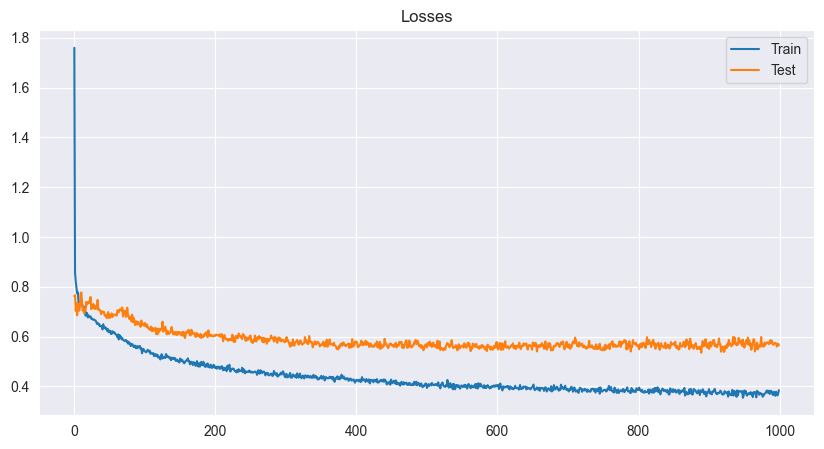

In [32]:
# plot the losses todo
plt.figure(figsize=(10, 5))
plt.plot(causal_cf_metrics["train_loss"], label="Train")
plt.plot(causal_cf_metrics["test_loss"], label="Test")
plt.title("Losses")
plt.legend()
plt.show()

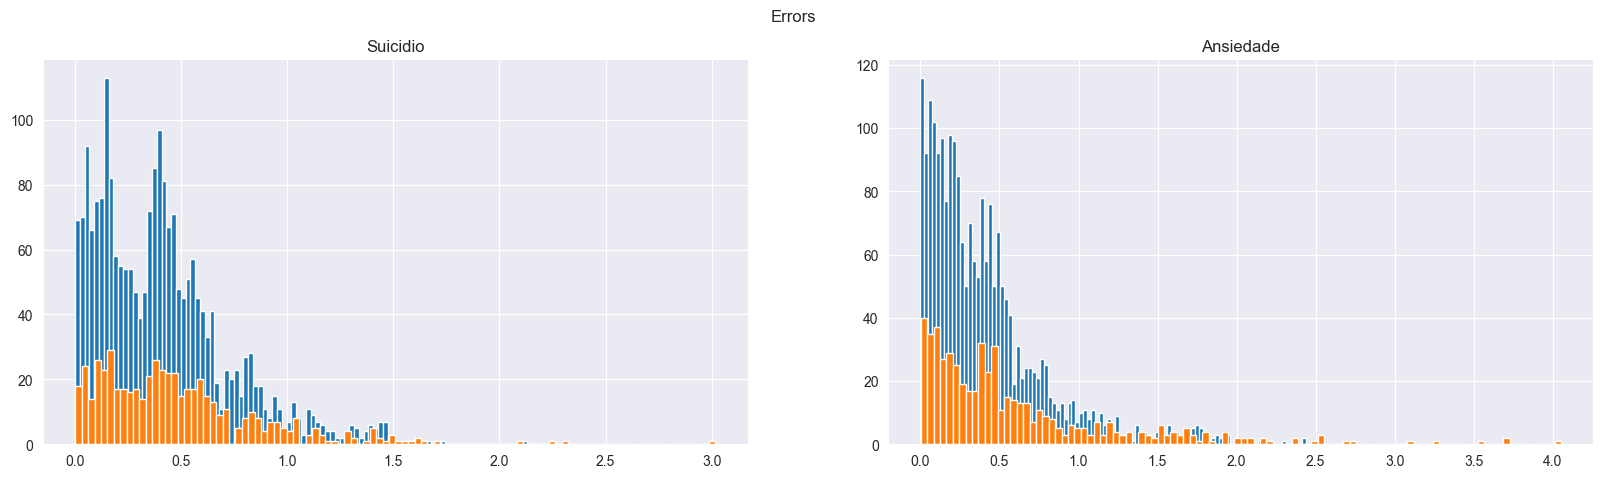

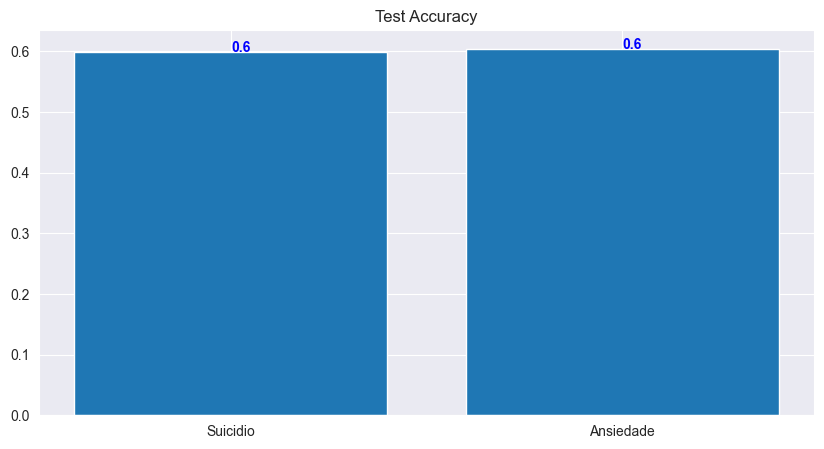

In [33]:

# plot the errors todo
n_targets = len(targets)
fig, axs = plt.subplots(1, n_targets, figsize=(20, 5))
fig.suptitle("Errors")
for i in range(n_targets):
    axs[i].hist(causal_cf_metrics["train_error"][:, i], label="Train", bins=100)
    axs[i].hist(causal_cf_metrics["test_error"][:, i], label="Test", bins=100)
    axs[i].set_title(targets[i])
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(targets, causal_cf_metrics["test_accuracy"])
plt.title("Test Accuracy")
# add the values to the bars
for i, v in enumerate(causal_cf_metrics["test_accuracy"]):
    plt.text(i, v, str(round(v.item(), 2)), color='blue', fontweight='bold')
plt.show()

In [192]:
#torch.save(causal_cf_model, "cf_models/causal_cf_model_2300.pt")
torch.save(causal_cf_model, "causal_test_cf_model.pt")

In [7]:
notears_selected = [
   "Suic_familia",
    "Capaz de tomar decisões importantes",
    "Estudante",
    "Hipocondriase",
    "Sentimentos_culpa",
    "Trabalho e interesses",
    'Dep_familia',
    'Alc_familia',
    'Capaz de desfrutar das coisas',
    'Droga',  
    'Suicidio',
    'Ansiedade',
'Suicidio_error', 'Ansiedade_error'    
     ]

In [13]:
#todo
#counterfact=torch.load("C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\\notebooks\cf_models\causal_cf_model_2300.pt")
#ausal_cf_model

In [45]:
#todo
df_suic_notears_with_errors = pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\\notebooks\cf_models\df_suic_notears_with_errors.csv', sep=',')
df_suic_notears_with_errors['Id'] = df_suic_notears_with_errors.index
#df_suic_notears_with_errors

In [20]:
#todo df_suic_notears_with_errors = pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\df_suic_notears_with_errors_teste.csv', sep=';')

In [50]:
df_test = df_test.merge(
    df_suic_notears_with_errors[['Id', 'Suicidio_error', 'Ansiedade_error']],
    on='Id',
    how='inner'  # ou 'inner' se quiser apenas os IDs que estão em ambos
)

In [54]:
# 2. Substituir colunas com os valores do _y (vindos de df_suic_notears_with_errors)
'''df_test['Suicidio_error'] = df_test['Suicidio_error_y']
df_test['Ansiedade_error'] = df_test['Ansiedade_error_y']

# 3. Remover colunas duplicadas (_x e _y)
df_test.drop(columns=['Suicidio_error_x', 'Suicidio_error_y', 
                      'Ansiedade_error_x', 'Ansiedade_error_y'], inplace=True)
df_test'''

,Suic_familia,Capaz de tomar decisões importantes,Estudante,Hipocondriase,Sentimentos_culpa,Trabalho e interesses,Dep_familia,Alc_familia,Capaz de desfrutar das coisas,Droga,Suicidio,Ansiedade,Id,Suicidio_error,Ansiedade_error
0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,0.0,2.0,2.0,3389,0.246063,0.042444
1,1.0,2.0,1.0,0.0,3.0,2.0,1.0,1.0,2.0,0.0,2.0,3.0,2119,0.171797,0.142309
2,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,2507,0.110597,0.168239
3,1.0,1.0,0.0,1.0,2.0,3.0,1.0,1.0,1.0,0.0,1.0,3.0,70,0.110597,0.831761
4,1.0,2.0,0.0,0.0,0.0,4.0,1.0,1.0,2.0,0.0,0.0,2.0,2610,0.109356,0.044237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1.0,1.0,0.0,3.0,2.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,565,0.079219,0.575701
1182,1.0,2.0,0.0,2.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,313,0.889403,0.168239
1183,1.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,2.0,0.0,1.0,1.0,601,0.110597,1.168239
1184,1.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,233,0.278864,0.068872


In [65]:
df_train

,Suic_familia,Capaz de tomar decisões importantes,Estudante,Hipocondriase,Sentimentos_culpa,Trabalho e interesses,Dep_familia,Alc_familia,Capaz de desfrutar das coisas,Droga,Suicidio,Ansiedade,Suicidio_error,Ansiedade_error,Id
0,1.0,1.0,0.0,0.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,0.889403,0.141686,2015
1,1.0,2.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,0.0,2.0,3.0,0.297750,0.137006,3577
2,1.0,2.0,0.0,3.0,4.0,3.0,1.0,1.0,2.0,0.0,2.0,4.0,0.193416,0.578543,3185
3,1.0,2.0,1.0,0.0,3.0,2.0,1.0,1.0,2.0,0.0,2.0,3.0,1.110597,0.831761,111
4,1.0,1.0,0.0,2.0,3.0,3.0,1.0,1.0,1.0,0.0,1.0,2.0,0.110597,0.168239,2320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,1.0,2.0,0.0,3.0,1.0,3.0,1.0,1.0,2.0,0.0,0.0,3.0,0.889403,0.831761,1130
2763,1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.091750,0.135850,1294
2764,1.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0,3.0,0.053213,0.207656,860
2765,1.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,0.101096,0.039551,3507


In [57]:
df_test=df_test[notears_selected].copy()

In [ ]:
df_dif_target_diminuiu['Id'].nunique()  

In [16]:
#df_suic.to_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\\notebooks\cf_models\df_s.csv', sep=',')

In [16]:
targets = ["Suicidio", "Ansiedade"]


In [112]:
#df.drop(columns=['Ansiedade'],inplace=True)

In [35]:
# Definição do dicionário de ranges para cada feature
feature_ranges_map = {    
    'Capaz de tomar decisões importantes': [1, 2, 3, 4, 5],
    'Estudante': [0, 1],
    'Hipocondriase': [0, 1, 2, 3, 4],
    'Sentimentos_culpa': [0, 1, 2, 3, 4],
    'Trabalho e interesses': [0, 1, 2, 3, 4],
    'Dep_familia': [0, 1],
    'Alc_familia': [0, 1],
    'Capaz de desfrutar das coisas': [1, 2, 3, 4, 5],
    'Droga': [0, 1, 2],
    'Suic_familia': [0, 1]
}

features = ["Capaz de tomar decisões importantes", "Estudante", "Hipocondriase",
            "Sentimentos_culpa", "Trabalho e interesses", "Dep_familia", "Alc_familia",
            "Capaz de desfrutar das coisas", "Droga", "Suic_familia"]

# Dicionário para rastrear reduções de ideação suicida por ID
reduced_ideation_map = {}

# Função para calcular a função de energia (custo) para o Simulated Annealing
def energy_function(suicidio_value):
    """
    Calculate the energy (cost) of a solution. You can modify this function
    based on your model's objective (e.g., difference in prediction from counterfactuals).
    """
    
    suicidio = suicidio_value
    # A energia pode ser baseada em alguma função do target
    return abs(suicidio - 2) * 0.1

#1900000
def simulated_annealing(data, max_iter=100, temp=1.0, temp_start=10, temp_end=0.001, alpha=0.99999):#1000 10
   # def simulated_annealing(data, max_iter=10000, temp=1.0, temp_start=10, temp_end=0.01, alpha=0.99999):
    df_1 = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])
    best_energy = float('inf')
    temp = temp_start

    # Listas para armazenar o comportamento do SA
    energy_history = []
    temperature_history = []

    weights_dict = {
        id_: 0.5 if data.at[id_, "Suicidio"] == 0 
        else 1 if data.at[id_, "Suicidio"] == 1 
        else 2 
        for id_ in data.index.unique()
    }

    id_list = np.array(list(weights_dict.keys()))
    weights = np.array([weights_dict[id_] for id_ in id_list], dtype=float)
    weights /= weights.sum()

    features = list(feature_ranges_map.keys())
    feature_values_map = {c: list(feature_ranges_map[c]) for c in features}

    for c in features:
        data[f'{c}_original'] = data[c].copy()

    for i in range(max_iter):
        random_id = np.random.choice(id_list, p=weights)
        current_data = data.loc[[random_id]].copy()

        c = np.random.choice(features)
        original_value = current_data.loc[random_id, f'{c}_original']
        new_value = np.random.choice(feature_values_map[c])

        if current_data[c].values[0] != new_value:  # Se houve alteração no valor
            current_data.loc[random_id, c] = new_value

            df_1_tmp = contrafact_dp(current_data[notears_selected], c, random_id)

            if not df_1_tmp.empty:
                counterfactual = current_data.copy()
                counterfactual[c] = new_value
                counterfactual['Suicidio'] = df_1_tmp['Suicidio_new'].values[0]
                suicidio_value = df_1_tmp['Suicidio'].values[0]

                new_energy = energy_function(suicidio_value=suicidio_value)

                if c == 'Suic_familia':
                    num_changes = (data.loc[data.index == random_id, 'Suic_familia'] != 
                                   data.loc[data.index == random_id, 'Suic_familia_original']).sum()
                    new_energy += num_changes * 10  # Penalização multiplicada por 10

                # Armazena energia e temperatura
                energy_history.append(best_energy)
                temperature_history.append(temp)

                if new_energy < best_energy or np.random.rand() < np.exp(-(new_energy - best_energy) / temp):
                    best_energy = new_energy
                    data.loc[random_id, c] = new_value  # Atualiza o dataframe

                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor'].isna()), 'Valor'] = original_value
                    df_1_tmp.loc[(df_1_tmp['Id'] == random_id) & (df_1_tmp['Feature'] == c) & (df_1_tmp['Valor_new'].isna()), 'Valor_new'] = new_value

                    mask_df_1 = pd.DataFrame({
                        'Id': [random_id],
                        'Feature': [c],
                        'Valor': [original_value],
                        'Valor_new': [new_value]
                    })

                    if not df_1_tmp.empty:
                        if not ((df_1[['Id', 'Feature', 'Valor', 'Valor_new']] == mask_df_1.values).all(axis=1)).any():
                            df_1 = pd.concat([df_1, df_1_tmp], ignore_index=True)

            #temp = max(temp * alpha, temp_end)    
            #temp -= (temp_start - temp_end) / max_iter     
            temp = max(temp * alpha, temp_end / 10)


           # temp = max(temp * alpha, temp_end)

    # Salvando os dados da execução
    np.save("energy_history.npy", energy_history)
    np.save("temperature_history.npy", temperature_history)

    return df_1

# Função para gerar contrafactuais
def contrafact_dp(df, coluna, i):
    df_1 = pd.DataFrame(columns = ['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor','Valor_new'])
    dataset = CausalDataset(df.values, [df.columns.get_loc(c) for c in targets])        
        
    cf_idx = i
     
    # predict the counterfactuals
    with torch.no_grad():            
        for data, y_true in dataset:
            data = data.unsqueeze(0)                
            i = counterfact.individuality(data)                
            
            cf = counterfact.counterfactual(data, i)
            cf = cf.squeeze(0).round().numpy().tolist()
            suic = cf[0]    
            if suic != df["Suicidio"][cf_idx]:
                df1_tmp = pd.DataFrame({'Id' : [cf_idx], 'Feature' : [coluna], 'Suicidio' : [df["Suicidio"][cf_idx]], 'Suicidio_new' : [suic], 'Valor' : [np.nan], 'Valor_new' : [np.nan]})
                df_1 = pd.concat([df_1, df1_tmp])                   
   
    return df_1


In [36]:
# Reordenação das features
features = ["Capaz de tomar decisões importantes", "Estudante", "Hipocondriase",
            "Sentimentos_culpa", "Trabalho e interesses", "Dep_familia", "Alc_familia",
            "Capaz de desfrutar das coisas", "Droga", "Suic_familia"]

targets = ["Suicidio", "Ansiedade"]

df_sim = pd.DataFrame(columns=['Id', 'Feature', 'Suicidio', 'Suicidio_new', 'Valor', 'Valor_new'])

start = time.time()
print(start)
# Aplicando a função simulated_annealing no dataset
#df_sim, df_nao = contr_dp(df_suic, df_sim, df_nao)
df_sim = simulated_annealing(df_test.loc[df_test.Suicidio!=0].copy())  #todo correto geral
#data, df_1, df_sim = simulated_annealing(df_suic.loc[df_suic.Suicidio!=0].copy())  #todo buscar mudanças em todas as features

#1000 1009 1038
#df_sim, df_nao = contr_dp(df_suic[df_suic.index == 1038], df_sim, df_nao)
end = time.time()
print(end)
elapsed = (end - start)
str(timedelta(seconds=elapsed))

1750728955.8142562
1750728958.5871298


'0:00:02.772874'

In [45]:
'''teste contrafactual
df_sim2 = df_sim.loc[df_sim.Id.isin([0,3])]
df_sim2['valor_max']=df_sim2.groupby(['Id','Feature', 'Suicidio_new'])[['Valor_new']].transform('max') 
df_sim2=df_sim2[["Id", "Feature", 'Suicidio_new',"valor_max"]].copy().drop_duplicates()'''

C:\Users\Cristiane\AppData\Local\Temp\ipykernel_5996\1981578910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sim2['valor_max']=df_sim2.groupby(['Id','Feature', 'Suicidio_new'])[['Valor_new']].transform('max')


In [47]:
print(df_sim2)

   Id                              Feature  Suicidio_new  valor_max
0   3                        Hipocondriase           1.0        4.0
1   0                        Hipocondriase           1.0        3.0
3   3                Trabalho e interesses           1.0        2.0
4   3                                Droga           1.0        2.0
5   3                    Sentimentos_culpa           0.0        0.0
7   3                         Suic_familia           0.0        0.0
9   3  Capaz de tomar decisões importantes           0.0        5.0
11  0                                Droga           1.0        2.0
13  3        Capaz de desfrutar das coisas           1.0        4.0
15  0                          Alc_familia           1.0        0.0
25  0                            Estudante           1.0        1.0
26  0                Trabalho e interesses           1.0        4.0
28  0        Capaz de desfrutar das coisas           1.0        5.0
31  0                    Sentimentos_culpa      

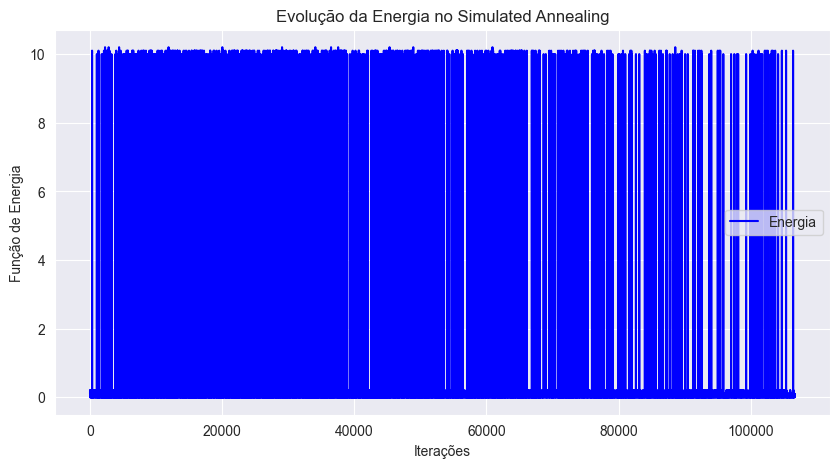

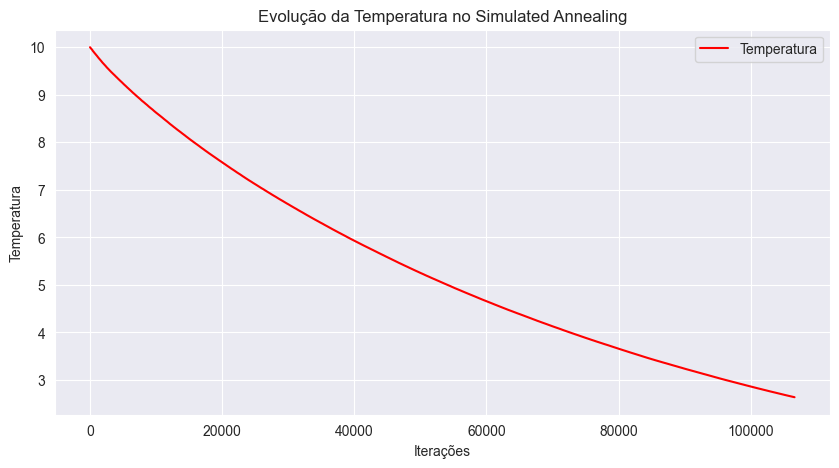

In [174]:
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados salvos
energy_history = np.load("energy_history.npy")
temperature_history = np.load("temperature_history.npy")

# Criar gráfico da evolução da energia
plt.figure(figsize=(10, 5))
plt.plot(energy_history, label="Energia", color='blue')
plt.xlabel("Iterações")
plt.ylabel("Função de Energia")
plt.title("Evolução da Energia no Simulated Annealing")
plt.legend()
plt.show()

# Criar gráfico da evolução da temperatura
plt.figure(figsize=(10, 5))
plt.plot(temperature_history, label="Temperatura", color='red')
plt.xlabel("Iterações")
plt.ylabel("Temperatura")
plt.title("Evolução da Temperatura no Simulated Annealing")
plt.legend()
plt.show()

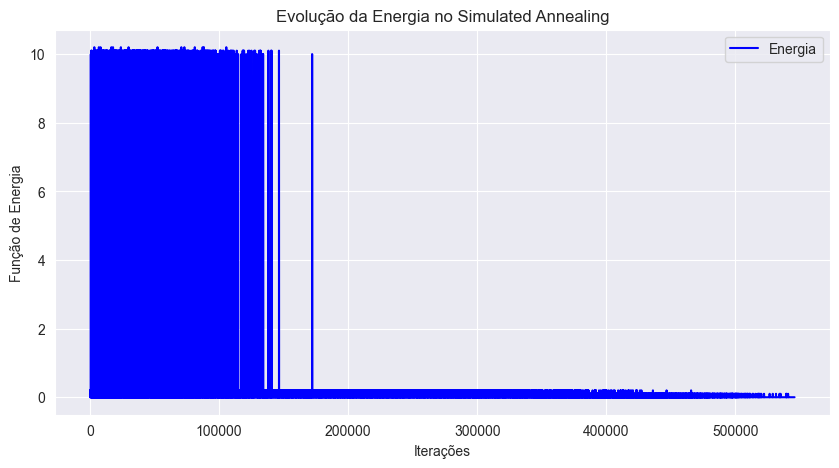

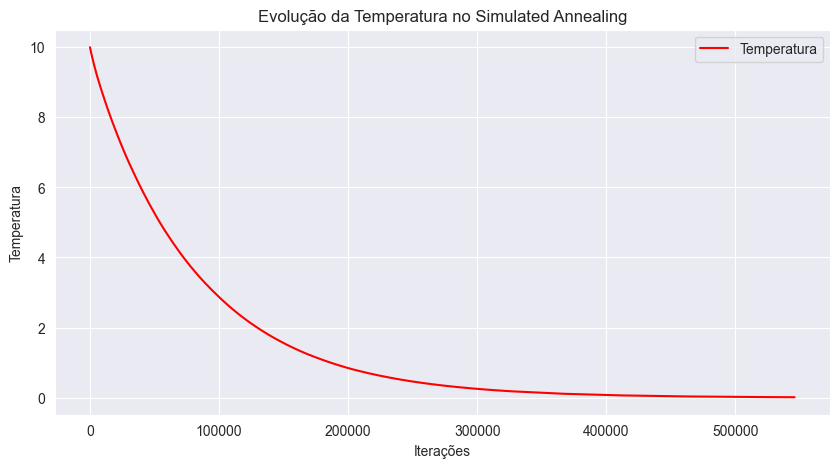

In [185]:
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados salvos
energy_history = np.load("energy_history.npy")
temperature_history = np.load("temperature_history.npy")

# Criar gráfico da evolução da energia
plt.figure(figsize=(10, 5))
plt.plot(energy_history, label="Energia", color='blue')
plt.xlabel("Iterações")
plt.ylabel("Função de Energia")
plt.title("Evolução da Energia no Simulated Annealing")
plt.legend()
plt.show()

# Criar gráfico da evolução da temperatura
plt.figure(figsize=(10, 5))
plt.plot(temperature_history, label="Temperatura", color='red')
plt.xlabel("Iterações")
plt.ylabel("Temperatura")
plt.title("Evolução da Temperatura no Simulated Annealing")
plt.legend()
plt.show()


In [188]:
df_sim.to_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\df_sim_SN_12_06.csv', sep=',')
#df_nao.to_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\df_nao_SN_09_02.csv', sep=',')

In [190]:
df_test.to_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\test.csv', sep=',')

In [82]:
df_test.Id.unique()

array([3389, 2119, 2507, ...,  601,  233, 3370], dtype=int64)

In [27]:
df_sim['dif_target'] = df_sim.Suicidio_new-df_sim.Suicidio
df_sim['dif_valor'] = df_sim.Valor_new-df_sim.Valor

In [28]:
df_dif_target_diminuiu = df_sim.loc[(df_sim.dif_target < 0)]

In [29]:
df_dif_target_diminuiu['valor_max']=df_dif_target_diminuiu.groupby(['Id','Feature'])[['Valor_new']].transform('max')
df_val_max_diminuiu=df_dif_target_diminuiu[["Id", "Feature","valor_max"]].copy().drop_duplicates()

In [30]:
df_dif_target_aumentou = df_sim.loc[(df_sim.dif_target > 0) & (df_sim.dif_valor < 0)]
df_dif_target_aumentou['valor_max']=df_dif_target_aumentou.groupby(['Id','Feature'])[['Valor_new']].transform('max')
df_val_max_aumentou=df_dif_target_aumentou[["Id", "Feature","valor_max"]].copy().drop_duplicates()

In [34]:
df_sim.groupby(['Id','Feature', 'Suicidio'])[['Valor_new']].transform('max')  

,Id,Feature,Suicidio,Suicidio_new,Valor,Valor_new,dif_target,dif_valor,valor_max
0,2,Suic_familia,2,1.0,1.0,0.0,-1.0,-1.0,1.0
1,3,Alc_familia,2,1.0,1.0,0.0,-1.0,-1.0,1.0
2,3,Hipocondriase,2,1.0,2.0,3.0,-1.0,1.0,4.0
3,1,Alc_familia,2,1.0,1.0,0.0,-1.0,-1.0,1.0
4,3,Hipocondriase,2,1.0,2.0,0.0,-1.0,-2.0,4.0
...,...,...,...,...,...,...,...,...,...
137,2,Trabalho e interesses,2,1.0,3.0,1.0,-1.0,-2.0,4.0
138,2,Capaz de desfrutar das coisas,2,1.0,2.0,4.0,-1.0,2.0,5.0
139,2,Capaz de desfrutar das coisas,2,1.0,2.0,5.0,-1.0,3.0,5.0
140,2,Trabalho e interesses,2,1.0,3.0,2.0,-1.0,-1.0,4.0


In [32]:
df_dif_target_aumentou['Id'].nunique()  

0

In [33]:
df_test['Id'].nunique()  

KeyError: 'Id'

In [ ]:
df_sim['Id'].nunique()  

In [189]:
df_sim

,Id,Feature,Suicidio,Suicidio_new,Valor,Valor_new
0,1034,Suic_familia,1.0,2.0,1.0,0.0
1,796,Capaz de desfrutar das coisas,1.0,2.0,2.0,1.0
2,380,Dep_familia,2.0,1.0,1.0,0.0
3,717,Trabalho e interesses,2.0,1.0,3.0,1.0
4,848,Droga,1.0,2.0,0.0,2.0
...,...,...,...,...,...,...
26633,396,Hipocondriase,1.0,2.0,2.0,2.0
26634,587,Trabalho e interesses,1.0,0.0,3.0,2.0
26635,712,Hipocondriase,1.0,-0.0,0.0,0.0
26636,513,Capaz de tomar decisões importantes,1.0,0.0,2.0,1.0
